In [ ]:
!pip install datasets pandas pymongo sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.0/670.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 29.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (

In [ ]:
!pip install -U transformers accelerate # accelerate to use gpu capabilities

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd

In [ ]:
dataset = load_dataset("MongoDB/embedded_movies")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['directors', 'title', 'imdb', 'plot_embedding', 'awards', 'rated', 'countries', 'type', 'writers', 'metacritic', 'languages', 'fullplot', 'genres', 'poster', 'cast', 'runtime', 'plot', 'num_mflix_comments'],
        num_rows: 1500
    })
})

In [ ]:
dataset_df = pd.DataFrame(dataset["train"])

In [ ]:
dataset_df.head()

,directors,title,imdb,plot_embedding,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","[0.00072939653, -0.026834568, 0.013515796, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","[-0.022837115, -0.022941574, 0.014937485, -0.0...","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0
2,[Herbert Brenon],Beau Geste,"{'id': 16634, 'rating': 6.9, 'votes': 222}","[0.00023330493, -0.028511643, 0.014653289, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Herbert Brenon (adaptation), John Russell (ad...",NaN,[English],"Michael ""Beau"" Geste leaves England in disgrac...","[Action, Adventure, Drama]",None,"[Ronald Colman, Neil Hamilton, Ralph Forbes, A...",101.0,"Michael ""Beau"" Geste leaves England in disgrac...",0
3,[Albert Parker],The Black Pirate,"{'id': 16654, 'rating': 7.2, 'votes': 1146}","[-0.005927917, -0.033394486, 0.0015323418, -0....","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Douglas Fairbanks (story), Jack Cunningham (a...",NaN,None,A nobleman vows to avenge the death of his fat...,"[Adventure, Action]",https://m.media-amazon.com/images/M/MV5BMzU0ND...,"[Billie Dove, Tempe Pigott, Donald Crisp, Sam ...",88.0,"Seeking revenge, an athletic young man joins t...",1
4,[Sam Taylor],For Heaven's Sake,"{'id': 16895, 'rating': 7.6, 'votes': 918}","[-0.0059373598, -0.026604708, -0.0070914757, -...","{'nominations': 1, 'text': '1 nomination.', 'w...",PASSED,[USA],movie,"[Ted Wilde (story), John Grey (story), Clyde B...",NaN,[English],"The Uptown Boy, J. Harold Manners (Lloyd) is a...","[Action, Comedy, Romance]",https://m.media-amazon.com/images/M/MV5BMTcxMT...,"[Harold Lloyd, Jobyna Ralston, Noah Young, Jim...",58.0,An irresponsible young millionaire changes his...,0


In [ ]:
dataset_df.columns

Index(['directors', 'title', 'imdb', 'plot_embedding', 'awards', 'rated',
       'countries', 'type', 'writers', 'metacritic', 'languages', 'fullplot',
       'genres', 'poster', 'cast', 'runtime', 'plot', 'num_mflix_comments'],
      dtype='object')

In [ ]:
dataset_df["plot"][0]

"Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle's secretary has been named as her guardian until she marries, at which time she will officially take ..."

In [ ]:
dataset_df["fullplot"][0]

'Young Pauline is left a lot of money when her wealthy uncle dies. However, her uncle\'s secretary has been named as her guardian until she marries, at which time she will officially take possession of her inheritance. Meanwhile, her "guardian" and his confederates constantly come up with schemes to get rid of Pauline so that he can get his hands on the money himself.'

In [ ]:
dataset_df["num_mflix_comments"][0]

0

In [ ]:
dataset_df[o"fullplt"].isnull().sum()

SyntaxError: invalid syntax (<ipython-input-14-0c7d75b03453>, line 1)

In [ ]:
dataset_df.shape

(1500, 18)

In [ ]:
dataset_df["poster"][0]

'https://m.media-amazon.com/images/M/MV5BMzgxODk1Mzk2Ml5BMl5BanBnXkFtZTgwMDg0NzkwMjE@._V1_SY1000_SX677_AL_.jpg'

In [ ]:
dataset_df["plot_embedding"][0]

[0.00072939653,
 -0.026834568,
 0.013515796,
 -0.033257525,
 -0.001295428,
 0.022092875,
 -0.015958885,
 0.018283758,
 -0.030315313,
 -0.019479034,
 0.019400224,
 0.0106917955,
 -0.005001107,
 0.017981656,
 0.0036416466,
 -0.012918158,
 0.029816188,
 -0.00018706948,
 0.013193991,
 -0.024483424,
 -0.016011424,
 0.0019275442,
 -0.007467182,
 -0.011768856,
 0.012859052,
 -0.011722884,
 -0.002154121,
 -0.022539461,
 0.0010910163,
 -0.017351182,
 -0.005122605,
 -0.010035052,
 0.0073161307,
 -0.04103338,
 -0.021068355,
 0.009877433,
 0.023918625,
 -0.0037828467,
 0.0067776004,
 0.02159375,
 0.018993042,
 0.0034905956,
 0.0053557493,
 0.001825749,
 -0.026493061,
 0.021580614,
 0.0004851698,
 -0.02837135,
 -0.00970668,
 0.009279796,
 0.021751368,
 0.007834959,
 -0.0130495075,
 -0.02049042,
 -0.0009054861,
 -0.0011345256,
 0.00089563493,
 0.02842389,
 -0.012957564,
 0.014133136,
 0.035831966,
 -0.015538569,
 -0.0022296465,
 -0.0038419536,
 0.005523219,
 -0.009240391,
 -0.012215442,
 0.011447052

In [ ]:
len(dataset_df["plot_embedding"][0])


1536

In [ ]:
dataset_df.isnull().sum()

directors              13
title                   0
imdb                    0
plot_embedding         28
awards                  0
rated                 308
countries               0
type                    0
writers                13
metacritic            928
languages               1
fullplot               48
genres                  0
poster                 89
cast                    1
runtime                15
plot                   27
num_mflix_comments      0
dtype: int64

In [ ]:
dataset_df = dataset_df.dropna(subset=["fullplot"])

In [ ]:
dataset_df["fullplot"].isnull().sum()

0

In [ ]:
dataset_df = dataset_df.drop(columns=["plot_embedding"])

In [ ]:
dataset_df.head(2)

,directors,title,imdb,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0


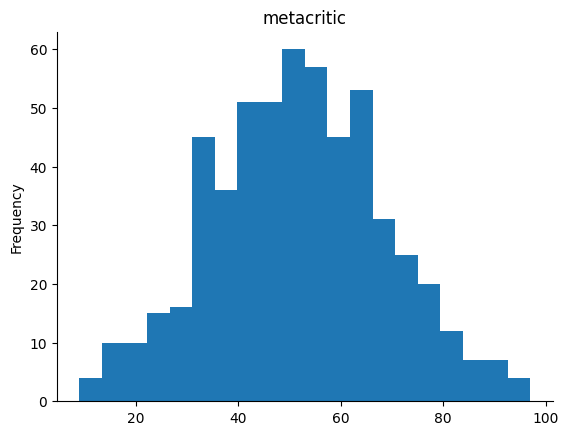

In [ ]:
# @title metacritic

from matplotlib import pyplot as plt
dataset_df['metacritic'].plot(kind='hist', bins=20, title='metacritic')
plt.gca().spines[['top','right',]].set_visible(False)

In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("thenlper/gte-large")

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
dataset_df["fullplot"][2]

'Michael "Beau" Geste leaves England in disgrace and joins the infamous French Foreign Legion. He is reunited with his two brothers in North Africa, where they face greater danger from their own sadistic commander than from the rebellious Arabs.'

In [ ]:
text = "        Deepak Thakur is a Data Scientist who create product of data     "

In [ ]:
text.strip()

'Deepak Thakur is a Data Scientist who create product of data'

In [ ]:
def get_embedding(text):

  if not text.strip():
    print("attempted to get embedding fro empty text.")
    return []

  embedding = embedding_model.encode(text)
  return embedding.tolist()

In [ ]:
dataset_df["embedding"] = dataset_df["fullplot"].apply(get_embedding)

In [ ]:
dataset_df.head(3)

,directors,title,imdb,awards,rated,countries,type,writers,metacritic,languages,fullplot,genres,poster,cast,runtime,plot,num_mflix_comments,embedding
0,"[Louis J. Gasnier, Donald MacKenzie]",The Perils of Pauline,"{'id': 4465, 'rating': 7.6, 'votes': 744}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Charles W. Goddard (screenplay), Basil Dickey...",NaN,[English],Young Pauline is left a lot of money when her ...,[Action],https://m.media-amazon.com/images/M/MV5BMzgxOD...,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",199.0,Young Pauline is left a lot of money when her ...,0,"[-0.009285839274525642, -0.005062091629952192,..."
1,"[Alfred J. Goulding, Hal Roach]",From Hand to Mouth,"{'id': 10146, 'rating': 7.0, 'votes': 639}","{'nominations': 1, 'text': '1 nomination.', 'w...",TV-G,[USA],movie,[H.M. Walker (titles)],NaN,[English],As a penniless man worries about how he will m...,"[Comedy, Short, Action]",https://m.media-amazon.com/images/M/MV5BNzE1OW...,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",22.0,A penniless young man tries to save an heiress...,0,"[-0.002439370146021247, 0.023095937445759773, ..."
2,[Herbert Brenon],Beau Geste,"{'id': 16634, 'rating': 6.9, 'votes': 222}","{'nominations': 0, 'text': '1 win.', 'wins': 1}",None,[USA],movie,"[Herbert Brenon (adaptation), John Russell (ad...",NaN,[English],"Michael ""Beau"" Geste leaves England in disgrac...","[Action, Adventure, Drama]",None,"[Ronald Colman, Neil Hamilton, Ralph Forbes, A...",101.0,"Michael ""Beau"" Geste leaves England in disgrac...",0,"[0.012204294092953205, -0.011455751955509186, ..."


In [ ]:
dataset_df["embedding"][0
                        ]

[-0.009285839274525642,
 -0.005062091629952192,
 -0.010958134196698666,
 0.029197754338383675,
 -0.00320404558442533,
 0.0065294052474200726,
 -0.000519637658726424,
 0.034043774008750916,
 0.004956735298037529,
 -0.00538758235052228,
 0.028133049607276917,
 0.0058067599311470985,
 0.00850922241806984,
 -0.006339727900922298,
 -0.026832519099116325,
 0.0007219561957754195,
 -0.05201868712902069,
 -0.018970804288983345,
 -0.034679438918828964,
 -0.014942392706871033,
 0.021869556978344917,
 0.01353765930980444,
 -0.07247655838727951,
 -0.039808884263038635,
 -0.00570263434201479,
 0.03734813630580902,
 0.036971915513277054,
 -0.0009293120237998664,
 0.056134432554244995,
 0.04322363808751106,
 -0.01612459309399128,
 -0.018139785155653954,
 0.018382979556918144,
 -0.031032321974635124,
 -0.006974262185394764,
 -0.01916695013642311,
 0.04368211328983307,
 -0.0282314270734787,
 -0.0007613761117681861,
 -0.06701458990573883,
 0.014413016848266125,
 -0.021378563717007637,
 0.0578315183520317

In [ ]:
len(dataset_df["embedding"][0])

1024

In [ ]:
len(dataset_df["embedding"][1])

1024

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import pymongo

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.30.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0


In [ ]:
!python -m pip install "pymongo[srv]"

In [ ]:
from google.colab import userdata
uri = userdata.get('MONGO_URI')

In [ ]:
from pymongo.mongo_client import MongoClient

In [ ]:
client = MongoClient(uri)

In [ ]:
try:
  client.admin.command('ping')
  print("pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
  print(e)

pinged your deployment. You successfully connected to MongoDB!


In [ ]:
def get_mongo_client(uri):
  try:
    client = MongoClient(uri)
    client.admin.command('ping')
    print("Pinged your deployment. You succesfully connected to MongoDB!")
    return client
  except Exception as e:
    print(e)
    return None

In [ ]:
mongo_client = get_mongo_client(uri)

Pinged your deployment. You succesfully connected to MongoDB!


In [ ]:
db = mongo_client["moviedb"]

In [ ]:
collection = db["moviecollection"]

In [ ]:
collection.insert_one({"name":"Deepak",
                       "designation":"GenAI Engineer",
                       "location": "Noida",
                       "mailid":"deepak2009thakur@gmail.com"})

InsertOneResult(ObjectId('66439772a45e243895706002'), acknowledged=True)

In [ ]:
collection.insert_one({"name":"Deepak2",
                       "designation": "ops Manager",
                       "Location": "Bengaluru"})

InsertOneResult(ObjectId('664397e1a45e243895706003'), acknowledged=True)

In [ ]:
collection2 =db["moviecollectionsecond"]

In [ ]:
collection2.insert_one({"name":"Deepak3",
                        "designation": "senior Data Scientist",
                        "location": "Bengaluru",
                        "phone": "9876543211"})

InsertOneResult(ObjectId('66439979a45e243895706004'), acknowledged=True)

In [ ]:
collection.delete_many({})

DeleteResult({'n': 2, 'electionId': ObjectId('7fffffff0000000000000025'), 'opTime': {'ts': Timestamp(1715706421, 6), 't': 37}, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1715706421, 7), 'signature': {'hash': b'\x97\\5\xb8\xf5^\x07~\x85c\x92Gpr\xc5\x7f\x95\xc6\xb9\x8d', 'keyId': 7333588831796461574}}, 'operationTime': Timestamp(1715706421, 6)}, acknowledged=True)